In [1]:
# Importing Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM 
from tensorflow.keras.callbacks import EarlyStopping 

In [2]:
data = {
    'date': ['2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
             '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
             '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
             '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
             '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
             '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
             '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
             '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
             '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01'],
    'sum_amt': [26937.60, 149481.40, 179022.77, 62621.58, 60998.88, 50433.76, 241557.52, 205239.96, 162870.32,
                128013.43, 157393.36, 179746.24, 72187.95, 5876.28, 6164.53, 31677.28, 11632.89, 19960.32,
                60483.36, 115295.52, 27484.56, 73153.04, 18575.60, 31320.64, 78841.20, 69798.58, 194990.33,
                373109.16, 171631.92, 77376.00, 273460.68, 354284.27, 395910.96, 315234.69, 272818.27, 559425.89,
                472742.88, 218053.62, 228617.73, 206923.52, 168841.57, 106971.09, 197565.31, 230109.93, 88780.00,
                236683.96, 375213.64, 139353.73, 195946.78, 68095.04, 69403.64, 184992.10, 68176.20, 20486.54,
                72026.75, 97156.92, 81293.84, 56113.86, 62707.23, 89789.19, 64405.71]
}

df = pd.DataFrame(data)

In [3]:
# Convert 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample the data to monthly frequency
df = df.resample('MS').asfreq()

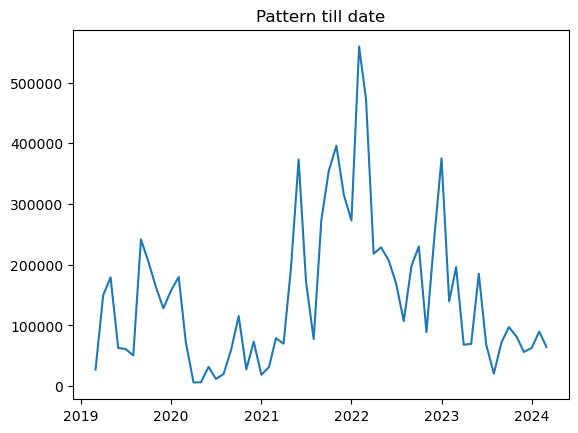

In [4]:
# Plotting the data till date
plt.title('Pattern till date')
plt.plot(df['sum_amt'])
plt.show()

In [5]:
# train and test split 
test_size = math.ceil(len(df)*0.2)
test_ind = len(df) - test_size
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [6]:
# Scaling the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [7]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length , batch_size=2)

In [8]:
X,y = generator[0]

In [9]:
n_features = 1
model = Sequential()
model.add (LSTM(200, input_shape = (length, n_features)))
model.add(Dense(25))
model.compile(optimizer = 'adam', loss = 'mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 25)                5025      
                                                                 
Total params: 166625 (650.88 KB)
Trainable params: 166625 (650.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
early_stop = EarlyStopping (monitor = 'val_loss',patience = 2)

In [12]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length , batch_size=2)

In [13]:
model.fit_generator(generator,epochs=100)

Epoch 1/100


D:\Users\sharesh\AppData\Local\Temp\ipykernel_16492\4290750455.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=100)



18/18 [==============================] - 6s 25ms/step - loss: 0.1142
Epoch 2/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0655
Epoch 3/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0585
Epoch 4/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0641
Epoch 5/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0560
Epoch 6/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0585
Epoch 7/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0514
Epoch 8/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0499
Epoch 9/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0543
Epoch 10/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0524
Epoch 11/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0493
Epoch 12/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0517
Epoch 13/100
18/18 [================

18/18 [==============================] - 0s 18ms/step - loss: 0.0096
Epoch 99/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0092
Epoch 100/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0089


In [14]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0][0]  # Select the first prediction
    test_predictions.append(current_pred)
    current_pred = current_pred.reshape((1, 1, 1))  # Reshape for concatenation
    current_batch = np.append(current_batch[:, 1:, :], current_pred, axis=1)

test_predictions = np.array(test_predictions)

1/1 [==============================] - 0s 58ms/step


In [15]:
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
test['Predictions'] = true_predictions

D:\Users\sharesh\AppData\Local\Temp\ipykernel_16492\2105480157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [16]:
test

,sum_amt,Predictions
date,,
2023-03-01,195946.78,5998.865723
2023-04-01,68095.04,163545.500000
2023-05-01,69403.64,164770.000000
2023-06-01,184992.10,12295.240234
2023-07-01,68176.20,22656.712891
2023-08-01,20486.54,110974.265625
2023-09-01,72026.75,140687.828125
2023-10-01,97156.92,117619.960938
2023-11-01,81293.84,79092.539062


<Axes: xlabel='date'>

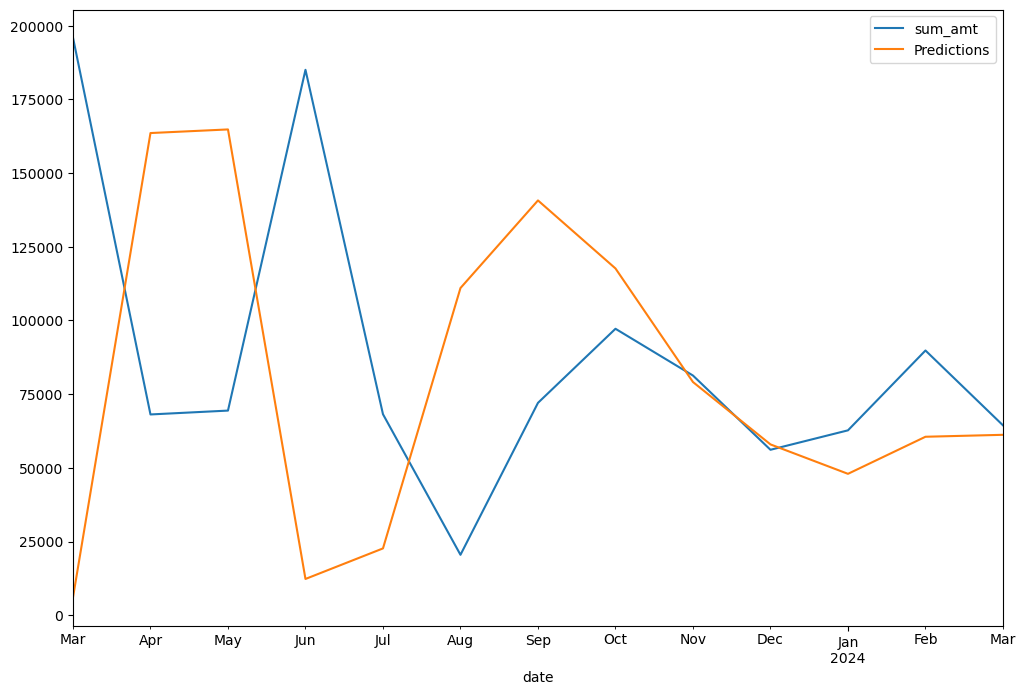

In [17]:
test.plot(figsize = (12,8))

In [18]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [19]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length , batch_size=1)

In [20]:
n_features = 1
model = Sequential()
model.add (LSTM(250,activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [21]:
model.fit_generator(generator,epochs=200)

Epoch 1/200


D:\Users\sharesh\AppData\Local\Temp\ipykernel_16492\860319289.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=200)


49/49 [==============================] - 4s 16ms/step - loss: 0.0594
Epoch 2/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0466
Epoch 3/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0461
Epoch 4/200
49/49 [==============================] - 1s 13ms/step - loss: 0.0418
Epoch 5/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0419
Epoch 6/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0395
Epoch 7/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0393
Epoch 8/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0374
Epoch 9/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0371
Epoch 10/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0343
Epoch 11/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0357
Epoch 12/200
49/49 [==============================] - 1s 14ms/step - loss: 0.0353
Epoch 13/200
49/49 [=================

49/49 [==============================] - 1s 15ms/step - loss: 0.0125
Epoch 102/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0110
Epoch 103/200
49/49 [==============================] - 1s 16ms/step - loss: 0.0098
Epoch 104/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0107
Epoch 105/200
49/49 [==============================] - 1s 16ms/step - loss: 0.0133
Epoch 106/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0115
Epoch 107/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0103
Epoch 108/200
49/49 [==============================] - 1s 16ms/step - loss: 0.0099
Epoch 109/200
49/49 [==============================] - 1s 16ms/step - loss: 0.0097
Epoch 110/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0101
Epoch 111/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0089
Epoch 112/200
49/49 [==============================] - 1s 16ms/step - loss: 0.0099
Epoch 113/200
49/4

49/49 [==============================] - 1s 17ms/step - loss: 0.0025
Epoch 200/200
49/49 [==============================] - 1s 15ms/step - loss: 0.0018


In [22]:
forecast = []
periods = 12 

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range (periods) :
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 63ms/step


In [23]:
forecast = scaler.inverse_transform(forecast)

In [24]:
forecast

array([[146681.87162276],
       [ 99094.60596706],
       [105499.23635287],
       [102011.80652825],
       [ 52929.37484975],
       [ 49977.60881535],
       [ 66671.03730217],
       [ 68518.37852159],
       [ 52303.15455132],
       [ 66681.63254149],
       [ 67895.37102636],
       [ 39027.41455134]])

In [25]:
forecast_index = pd.date_range(start='2024-04-01', periods = periods,freq = "MS")

In [29]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [30]:
forecast_df

,Forecast
2024-04-01,146681.871623
2024-05-01,99094.605967
2024-06-01,105499.236353
2024-07-01,102011.806528
2024-08-01,52929.374850
2024-09-01,49977.608815
2024-10-01,66671.037302
2024-11-01,68518.378522
2024-12-01,52303.154551
2025-01-01,66681.632541


<Axes: xlabel='date'>

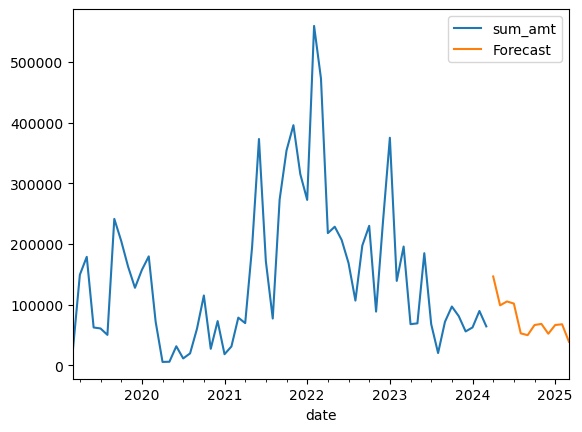

In [31]:
ax = df.plot()
forecast_df.plot(ax=ax)

(648.0, 662.0)

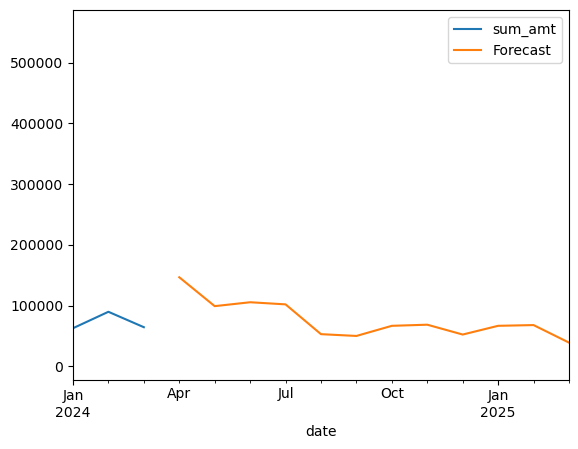

In [33]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2024-01-01','2025-03-01')

In [34]:
# Combine the two dataframes based on their indexes
combined_df = pd.concat([test["Predictions"], forecast_df["Forecast"]], axis=1)

In [35]:
# Create the "combo" column by summing "Predictions" and "Forecast" where both are not NaN
combined_df["combo"] = combined_df["Predictions"].add(combined_df["Forecast"], fill_value=0)

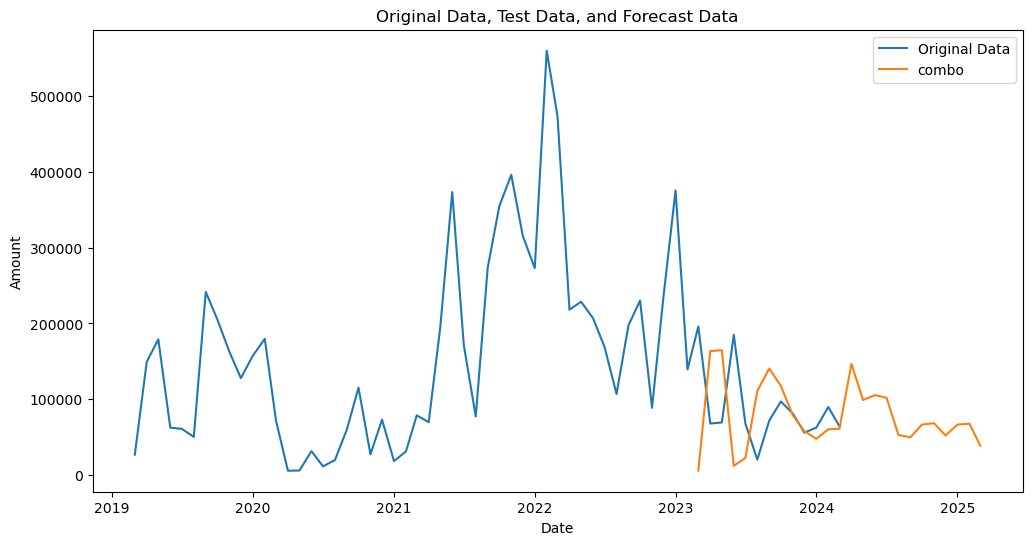

In [36]:
# Plotting the original data, test data, and forecast data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sum_amt'], label='Original Data')
# plt.plot(test.index, test['Predictions'], label='Test Data')
# plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast Data')
plt.plot(combined_df.index, combined_df['combo'], label='combo')
plt.title('Original Data, Test Data, and Forecast Data')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [37]:
rmse = math.sqrt(mean_squared_error(test['sum_amt'], test['Predictions']))
print(f"RMSE : {rmse}")

RMSE : 87966.44815339324


In [38]:
df.describe()

,sum_amt
count,61.000000
mean,147794.451148
std,121238.958631
min,5876.280000
25%,62707.230000
50%,106971.090000
75%,205239.960000
max,559425.890000


In [39]:
# Calculate directional accuracy for test data
test['Actual Change'] = test['sum_amt'].diff()
test['Predicted Change'] = test['Predictions'].diff()

# Remove the first row since it will have NaN values after differencing
test = test.iloc[1:]

# Calculate directional accuracy
directional_accuracy = (np.sign(test['Actual Change']) == np.sign(test['Predicted Change'])).mean()
print(f"Directional Accuracy: {directional_accuracy}")

Directional Accuracy: 0.4166666666666667


D:\Users\sharesh\AppData\Local\Temp\ipykernel_16492\4056619263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Actual Change'] = test['sum_amt'].diff()
D:\Users\sharesh\AppData\Local\Temp\ipykernel_16492\4056619263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted Change'] = test['Predictions'].diff()
